# LETS GROW MORE - Virtual Internship 2023
 
## Name : Prerna Shivdas Dabhade
## Data Science Intern
### #LGMVIP 


### Task 3- Prediction Using Decision Tree Algorithm


## Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("D:\letsgrowmore\Iris.csv",index_col=0)

#### Undestanding the data 

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isnull().sum().any()

False

In [6]:
data.shape

(150, 5)

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

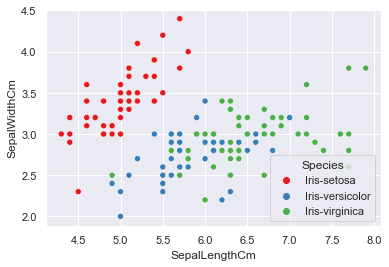

In [8]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=data,palette='Set1')

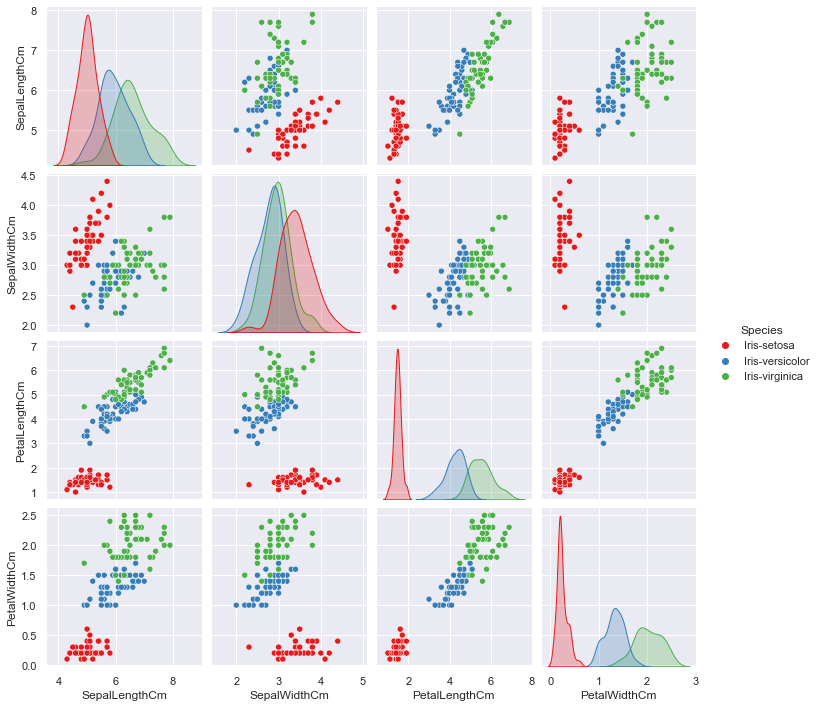

In [9]:
sns.pairplot(data,hue='Species',palette='Set1')

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

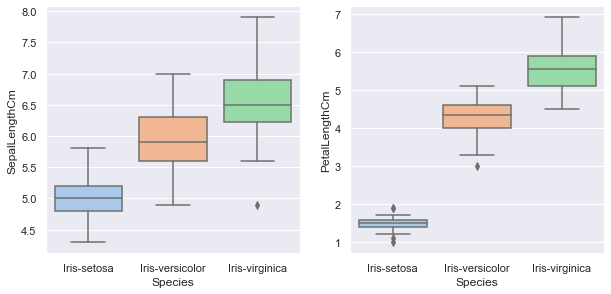

In [10]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(y='SepalLengthCm',x='Species',data=data,palette='pastel')

plt.subplot(2,2,2)
sns.boxplot(y='PetalLengthCm',x='Species',data=data,palette='pastel')

<AxesSubplot:>

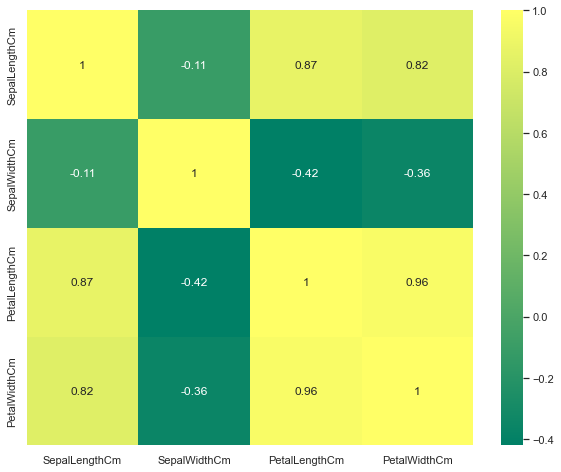

In [11]:
corr=data.corr()
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True,ax=ax,cmap='summer')

In [12]:
#Checking the unique values in target variable 
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Split Data

In [13]:
#splitting our data for training and testing 
x=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

In [14]:
y=data.Species.values

In [15]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [18]:
#creating the model 
model=tree.DecisionTreeClassifier(criterion='entropy')

# Model Creating

In [19]:
#training our classifier 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
#predicting using the  classifier
y_pred= model.predict(x_test)


In [21]:
model.score(x_test,y_test)

0.9736842105263158

### Evaluation 

In [22]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.9736842105263158

In [23]:
#Evaluation Summary 
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



## Decision Tree Visualization

[Text(0.4, 0.9, 'PetalLengthCm <= 2.35\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'PetalLengthCm <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'PetalWidthCm <= 1.65\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.3, 'SepalWidthCm <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.5, 'PetalLengthCm <= 5.05\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]\nclass = Iris-virginica'),
 Text(0.7, 0.3, 'SepalLengthCm <= 6.5\nentropy = 0.8

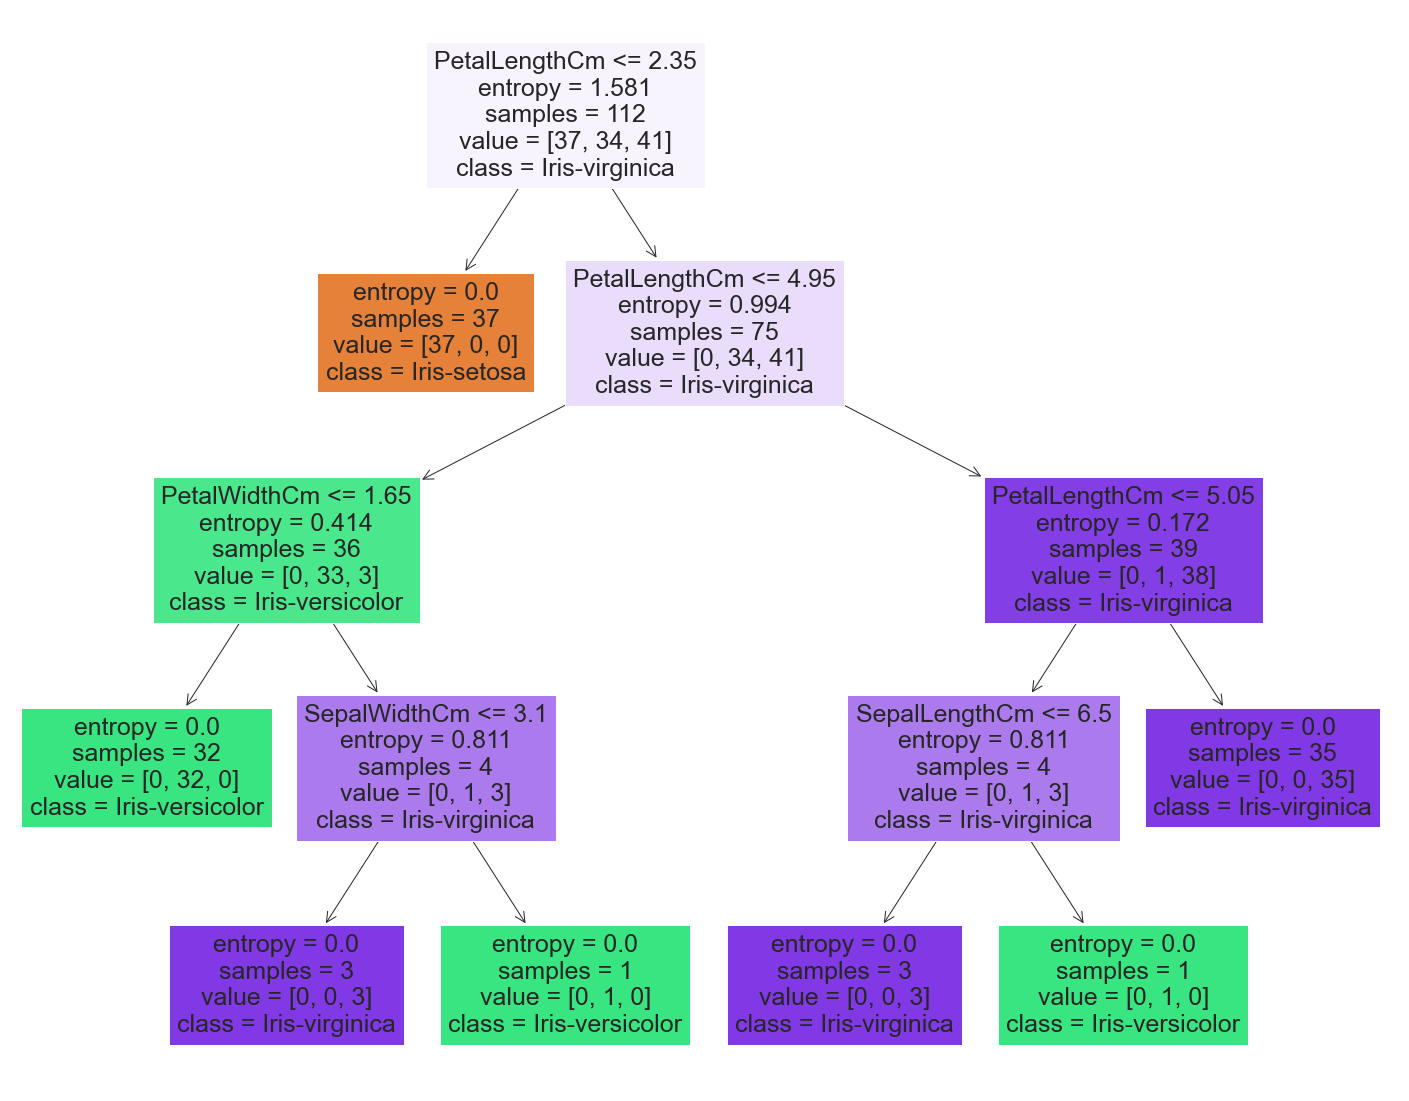

In [24]:
cn = data["Species"].unique().tolist()
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, feature_names=data.columns[:-1],class_names=cn,filled=True)


## Prediction 

In [25]:
y_pred=model.predict([[5.8, 2.8, 5.1, 2.4],
                     [6. , 2.2, 4. , 1. ],
                     [5.5, 4.2, 1.4, 0.2],
                     [7.3, 2.9, 6.3, 1.8],
                     [5. , 3.4, 1.5, 0.2]])
y_pred #This is our predicted value

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [26]:
y_test[:5] #this is our actual values 

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

## Thank You !!